In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [13]:
import pandas as pd
import io
df=pd.read_csv('Toyota.csv')
df

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,1431,7500,NaN,20544,Petrol,86,1.0,0,1300,3,1025
1432,1432,10845,72.0,??,Petrol,86,0.0,0,1300,3,1015
1433,1433,8500,NaN,17016,Petrol,86,0.0,0,1300,3,1015
1434,1434,7250,70.0,??,NaN,86,1.0,0,1300,3,1015


In [14]:
df.shape
df.drop(columns=['Unnamed: 0','KM','Age', 'FuelType','MetColor'], inplace=True)
df['Doors'].replace(['three','four','five'],['3','4','5'], inplace=True)
df

,Price,HP,Automatic,CC,Doors,Weight
0,13500,90,0,2000,3,1165
1,13750,90,0,2000,3,1165
2,13950,90,0,2000,3,1165
3,14950,90,0,2000,3,1165
4,13750,90,0,2000,3,1170
...,...,...,...,...,...,...
1431,7500,86,0,1300,3,1025
1432,10845,86,0,1300,3,1015
1433,8500,86,0,1300,3,1015
1434,7250,86,0,1300,3,1015


In [15]:
drug_label = LabelEncoder()
df['Price'] = drug_label.fit_transform(df['Price'])
df['HP'] = drug_label.fit_transform(df['HP'])
df['Automatic'] = drug_label.fit_transform(df['Automatic'])
df['CC'] = drug_label.fit_transform(df['CC'])
df['Doors'] = drug_label.fit_transform(df['Doors'])
df['Weight'] = drug_label.fit_transform(df['Weight'])
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   HP         1436 non-null   int32
 2   Automatic  1436 non-null   int64
 3   CC         1436 non-null   int64
 4   Doors      1436 non-null   int32
 5   Weight     1436 non-null   int64
dtypes: int32(2), int64(4)
memory usage: 56.2 KB


,Price,HP,Automatic,CC,Doors,Weight
0,161,9,0,11,1,42
1,162,9,0,11,1,42
2,164,9,0,11,1,42
3,169,9,0,11,1,42
4,162,9,0,11,1,43
...,...,...,...,...,...,...
1431,45,8,0,0,1,4
1432,117,8,0,0,1,2
1433,66,8,0,0,1,2
1434,36,8,0,0,1,2


In [16]:
df.describe()

,Price,HP,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,102.792479,3.828691,0.055710,5.073816,2.033426,15.721448
std,52.282962,3.674932,0.229441,2.942442,0.952677,12.102310
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,63.000000,1.000000,0.000000,3.000000,1.000000,7.000000
50%,99.000000,1.000000,0.000000,6.000000,2.000000,14.000000
75%,142.000000,8.000000,0.000000,6.000000,3.000000,21.000000
max,235.000000,12.000000,1.000000,11.000000,3.000000,58.000000


In [17]:
df.isnull().sum()

Price        0
HP           0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

<Axes: >

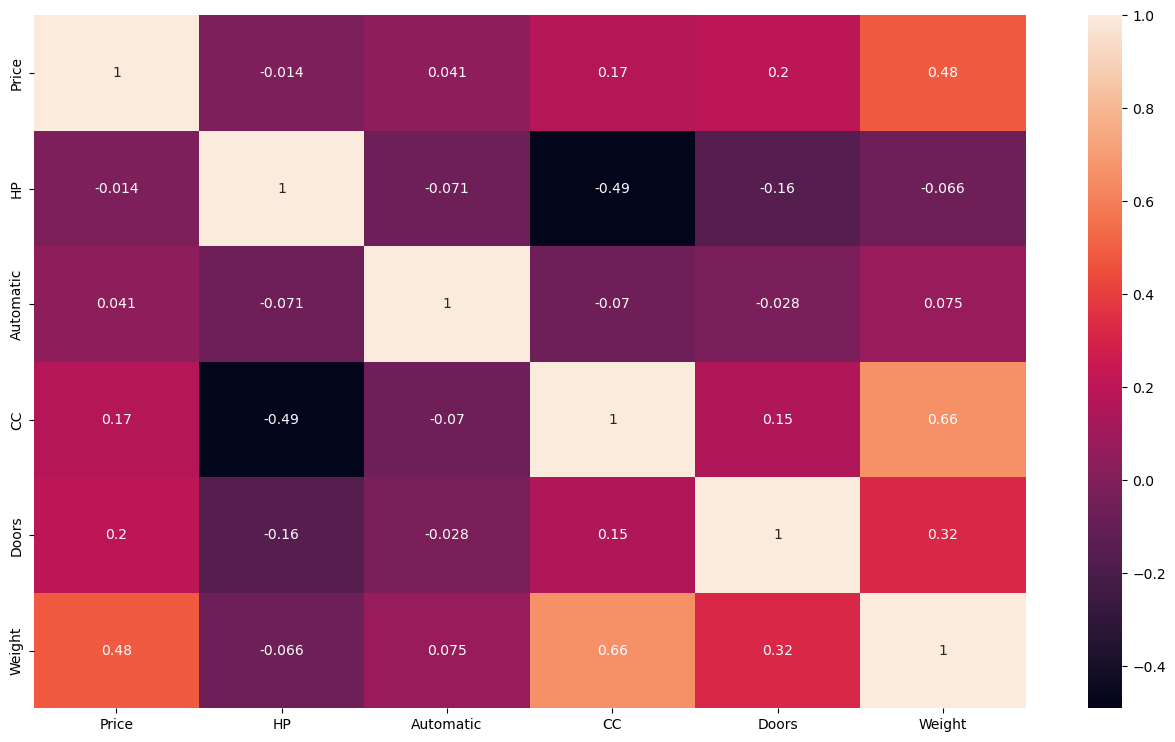

In [18]:
import seaborn as sns
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True)

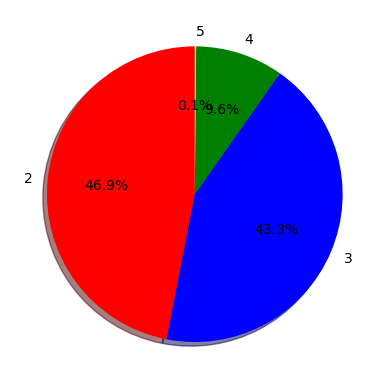

In [23]:
import matplotlib.pyplot as plt
labels = ['2', '3', '4', '5']
values = df['Doors'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['red', 'blue','green','yellow']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

In [13]:
df[['Drug', 'Sex', 'BP', 'Cholesterol']].head()

,Drug,Sex,BP,Cholesterol
0,4,0,0,0
1,2,1,1,0
2,2,1,1,0
3,3,0,2,0
4,4,0,1,0


In [24]:
X = df[['Price','HP','CC','Automatic','Weight']]
y = df['Doors']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2, random_state = 0)

In [26]:
tree_model = DecisionTreeClassifier()
tree_model = tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.8938207136640557

In [27]:
fig = plt.figure(figsize=(120,100))
tree_fig = tree.plot_tree(
tree_model,
feature_names = ['Price','HP','CC','Automatic','Weight'],
class_names = ['2', '3', '4', '5'],
filled = True)